## Final Project --- the relationship between depression and other diseases and habits

**Part 2: data analysis**

**Hailey  Wang**

## About this project:

I wanted to find out if there's a connection between depression and certain diseases and habits. So, I got data from CDC places and the Bureau of Economic Analysis to analyze each factor using county-level data.

I picked 10 factors – five physical diseases (asthma, heart disease, stroke, cancers excluding skin, diabetes) and five habits (obesity, lack of sleep, binge drinking, smoking, and income).

I did a regression on each factor and looked at the correlation coefficient. If it's less than 0.4, it means a weak correlation. A correlation between 0.5 and 0.7 indicates a moderate correlation. If it is more than 0.7, it means a strong correlation.

Afterward, I chose the factors that are at least moderately correlated with depression to create a spike map. This helps to make the results clearer, giving readers a geographic understanding of which counties are more affected by depression and those diseases or habits.

## 1. import

### 1.1 import package

In [1]:
import pandas as pd
import altair as alt
from scipy.stats import pearsonr
import geopandas as gpd
import numpy as np
 
import geopandas as gpd
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt

from shapely.geometry import shape

### 1.2 import data

#### 1.2.1 import cdc data

In [2]:
cdc_places = pd.read_csv('./cleaned cdc places with python.csv'
                        , usecols = ['Year', 'State', 'County','DataValue','Category','Geolocation'])
cdc_places

,Year,State,County,DataValue,Category,Geolocation
0,2021,California,Calaveras,10.3,Current Asthma,POINT (-120.5541065 38.1910682)
1,2021,Alabama,Fayette,6.9,Coronary Heart Disease,POINT (-87.7642923 33.7161568)
2,2021,Arkansas,Benton,13.7,Cognitive Disability,POINT (-94.2562984 36.3378189)
3,2021,Alabama,Calhoun,34.1,Physical Inactivity,POINT (-85.8279089 33.7705162)
4,2020,California,Sacramento,38.2,Core preventive services for older men,POINT (-121.3443291 38.4501363)
...,...,...,...,...,...,...
114343,2021,Wyoming,Sublette,3.7,Vision Disability,POINT (-109.9161701 42.7679284)
114344,2021,Wisconsin,Green Lake,28.1,High Blood Pressure,POINT (-88.9703796 43.7802469)
114345,2021,Wisconsin,Door,22.0,Depression,POINT (-87.0486828 45.0934165)
114346,2021,West Virginia,Cabell,18.4,Cognitive Disability,POINT (-82.2433966 38.4195778)


**Describe the database**

source: https://data.cdc.gov/500-Cities-Places/PLACES-Local-Data-for-Better-Health-County-Data-20/swc5-untb

time period: 2021

what the data can and can't tell you: It tells the county level health indicates. This dataset includes estimates for 36 measures: 13 for health outcomes, 9 for preventive services use, 4 for chronic disease-related health risk behaviors, 7 for disabilities, and 3 for health status.

It has some data missing. For example, it has no depreesion rate for all counties in Florida. According to the explanation on CDC Places website, Florida was unable to collect data over enough months to meet the minimum requirements for inclusion in the 2021 annual aggregate data set.



#### 1.2.2 import income data

In [3]:
combine_depression_income = pd.read_csv('../combine_depression_income with python.csv'
                        , usecols = ['Year', 'State', 'County','DataValue','Income','Category','Geolocation'])
combine_depression_income

,Year,State,County,DataValue,Category,Geolocation,Income
0,2021.0,Alabama,Cullman,25.2,Depression,POINT (-86.8692666 34.1319229),"46,762"
1,2021.0,Alaska,Bristol Bay,18.8,Depression,POINT (-156.9668053 58.741661),NaN
2,2021.0,Alabama,Calhoun,23.3,Depression,POINT (-85.8279089 33.7705162),"43,045"
3,2021.0,Alabama,Conecuh,23.1,Depression,POINT (-86.9887221 31.4309257),"40,467"
4,2021.0,Alabama,Etowah,25.0,Depression,POINT (-86.0342629 34.0476407),"42,571"
...,...,...,...,...,...,...,...
3259,NaN,Utah,Orange,NaN,NaN,NaN,"55,304"
3260,NaN,Utah,Orleans,NaN,NaN,NaN,"52,213"
3261,NaN,Utah,Rutland,NaN,NaN,NaN,"56,441"
3262,NaN,Utah,Windham,NaN,NaN,NaN,"55,590"


Describe the database

source: https://www.bea.gov/news/2022/personal-income-county-and-metropolitan-area-2021

time period: 2021 

What the data can and can’t tell you: It is personal income data from the Bureau of Economic Analysis (BEA). BEA’s County and metropolitan area per capita personal income statistics are calculated by dividing personal income with population. BEA used Census population figures to calculate annual per capita personal income statistics for 2020 through 2022.

## 2. look for depression value

In [5]:
cdc_places_depression = cdc_places[cdc_places['Category'] == 'Depression']
cdc_places_depression.sort_values('County')

,Year,State,County,DataValue,Category,Geolocation
87345,2021,South Carolina,Abbeville,23.6,Depression,POINT (-82.4540577 34.229041)
44711,2021,Louisiana,Acadia,30.1,Depression,POINT (-92.4110366 30.291497)
99911,2021,Virginia,Accomack,22.0,Depression,POINT (-75.7578073 37.7659435)
22970,2021,Idaho,Ada,25.1,Depression,POINT (-116.244376 43.4514767)
30635,2021,Kentucky,Adair,28.7,Depression,POINT (-85.2813796 37.1055589)
...,...,...,...,...,...,...
11785,2021,Colorado,Yuma,22.0,Depression,POINT (-102.4216491 40.0007703)
900,2021,Arizona,Yuma,18.4,Depression,POINT (-113.910905 32.7739424)
99684,2021,Texas,Zapata,21.3,Depression,POINT (-99.1826027 26.9969806)
100321,2021,Texas,Zavala,21.0,Depression,POINT (-99.7598304 28.8646523)


## 3. look for values for the nine factors in CDC dataset

### 3.1 asthma

In [6]:
cdc_places_asthma = cdc_places[cdc_places['Category'] == 'Current Asthma']
cdc_places_asthma.sort_values('County')

,Year,State,County,DataValue,Category,Geolocation
81770,2021,South Carolina,Abbeville,10.3,Current Asthma,POINT (-82.4540577 34.229041)
38975,2021,Louisiana,Acadia,10.8,Current Asthma,POINT (-92.4110366 30.291497)
99719,2021,Virginia,Accomack,11.5,Current Asthma,POINT (-75.7578073 37.7659435)
22792,2021,Idaho,Ada,9.5,Current Asthma,POINT (-116.244376 43.4514767)
27577,2021,Kentucky,Adair,11.7,Current Asthma,POINT (-85.2813796 37.1055589)
...,...,...,...,...,...,...
12651,2021,Colorado,Yuma,10.6,Current Asthma,POINT (-102.4216491 40.0007703)
5006,2021,Arizona,Yuma,9.9,Current Asthma,POINT (-113.910905 32.7739424)
107598,2021,Texas,Zapata,9.8,Current Asthma,POINT (-99.1826027 26.9969806)
106447,2021,Texas,Zavala,9.7,Current Asthma,POINT (-99.7598304 28.8646523)


### 3.2 heart disease

In [7]:
cdc_places_heart_disease = cdc_places[cdc_places['Category'] == 'Coronary Heart Disease']
cdc_places_heart_disease.sort_values('County')

,Year,State,County,DataValue,Category,Geolocation
84581,2021,South Carolina,Abbeville,6.1,Coronary Heart Disease,POINT (-82.4540577 34.229041)
37232,2021,Louisiana,Acadia,6.8,Coronary Heart Disease,POINT (-92.4110366 30.291497)
103893,2021,Virginia,Accomack,6.0,Coronary Heart Disease,POINT (-75.7578073 37.7659435)
24497,2021,Idaho,Ada,4.9,Coronary Heart Disease,POINT (-116.244376 43.4514767)
31299,2021,Iowa,Adair,5.3,Coronary Heart Disease,POINT (-94.4781643 41.3285283)
...,...,...,...,...,...,...
8597,2021,Arizona,Yuma,6.1,Coronary Heart Disease,POINT (-113.910905 32.7739424)
12069,2021,Colorado,Yuma,5.4,Coronary Heart Disease,POINT (-102.4216491 40.0007703)
100237,2021,Texas,Zapata,7.3,Coronary Heart Disease,POINT (-99.1826027 26.9969806)
98954,2021,Texas,Zavala,7.2,Coronary Heart Disease,POINT (-99.7598304 28.8646523)


### 3.3 stroke

In [8]:
cdc_places_stroke = cdc_places[cdc_places['Category'] == 'Stroke']
cdc_places_stroke.sort_values('County')

,Year,State,County,DataValue,Category,Geolocation
86903,2021,South Carolina,Abbeville,3.5,Stroke,POINT (-82.4540577 34.229041)
44191,2021,Louisiana,Acadia,3.7,Stroke,POINT (-92.4110366 30.291497)
107013,2021,Virginia,Accomack,3.5,Stroke,POINT (-75.7578073 37.7659435)
26061,2021,Idaho,Ada,2.4,Stroke,POINT (-116.244376 43.4514767)
78109,2021,Oklahoma,Adair,4.5,Stroke,POINT (-94.6510258 35.8980428)
...,...,...,...,...,...,...
12803,2021,Colorado,Yuma,2.8,Stroke,POINT (-102.4216491 40.0007703)
1214,2021,Arizona,Yuma,3.3,Stroke,POINT (-113.910905 32.7739424)
102945,2021,Texas,Zapata,3.9,Stroke,POINT (-99.1826027 26.9969806)
99996,2021,Texas,Zavala,3.8,Stroke,POINT (-99.7598304 28.8646523)


### 3.4 cancer (except skin)

In [9]:
cdc_places_cancer = cdc_places[cdc_places['Category'] == 'Cancer (except skin)']
cdc_places_cancer.sort_values('County')

,Year,State,County,DataValue,Category,Geolocation
86464,2021,South Carolina,Abbeville,6.0,Cancer (except skin),POINT (-82.4540577 34.229041)
37022,2021,Louisiana,Acadia,6.3,Cancer (except skin),POINT (-92.4110366 30.291497)
103881,2021,Virginia,Accomack,6.0,Cancer (except skin),POINT (-75.7578073 37.7659435)
22597,2021,Idaho,Ada,6.3,Cancer (except skin),POINT (-116.244376 43.4514767)
35550,2021,Iowa,Adair,6.4,Cancer (except skin),POINT (-94.4781643 41.3285283)
...,...,...,...,...,...,...
6994,2021,Arizona,Yuma,5.5,Cancer (except skin),POINT (-113.910905 32.7739424)
17114,2021,Colorado,Yuma,6.2,Cancer (except skin),POINT (-102.4216491 40.0007703)
104143,2021,Texas,Zapata,4.8,Cancer (except skin),POINT (-99.1826027 26.9969806)
101062,2021,Texas,Zavala,4.8,Cancer (except skin),POINT (-99.7598304 28.8646523)


### 3.5 diabetes

In [10]:
cdc_places_diabetes = cdc_places[cdc_places['Category'] == 'Diabetes']
cdc_places_diabetes.sort_values('County')

,Year,State,County,DataValue,Category,Geolocation
82061,2021,South Carolina,Abbeville,12.1,Diabetes,POINT (-82.4540577 34.229041)
44135,2021,Louisiana,Acadia,12.5,Diabetes,POINT (-92.4110366 30.291497)
104125,2021,Virginia,Accomack,12.3,Diabetes,POINT (-75.7578073 37.7659435)
24742,2021,Idaho,Ada,7.8,Diabetes,POINT (-116.244376 43.4514767)
44880,2021,Missouri,Adair,10.6,Diabetes,POINT (-92.6035922 40.1906655)
...,...,...,...,...,...,...
6619,2021,Arizona,Yuma,13.0,Diabetes,POINT (-113.910905 32.7739424)
10977,2021,Colorado,Yuma,8.4,Diabetes,POINT (-102.4216491 40.0007703)
105050,2021,Texas,Zapata,18.8,Diabetes,POINT (-99.1826027 26.9969806)
105132,2021,Texas,Zavala,19.0,Diabetes,POINT (-99.7598304 28.8646523)


### 3.6 obesity

In [11]:
cdc_places_obesity = cdc_places[cdc_places['Category'] == 'Obesity']
cdc_places_obesity.sort_values('County')

,Year,State,County,DataValue,Category,Geolocation
87993,2021,South Carolina,Abbeville,39.9,Obesity,POINT (-82.4540577 34.229041)
40914,2021,Louisiana,Acadia,39.5,Obesity,POINT (-92.4110366 30.291497)
105753,2021,Virginia,Accomack,40.1,Obesity,POINT (-75.7578073 37.7659435)
20232,2021,Idaho,Ada,28.5,Obesity,POINT (-116.244376 43.4514767)
31975,2021,Iowa,Adair,37.8,Obesity,POINT (-94.4781643 41.3285283)
...,...,...,...,...,...,...
15343,2021,Colorado,Yuma,29.1,Obesity,POINT (-102.4216491 40.0007703)
4543,2021,Arizona,Yuma,40.8,Obesity,POINT (-113.910905 32.7739424)
105130,2021,Texas,Zapata,43.8,Obesity,POINT (-99.1826027 26.9969806)
104004,2021,Texas,Zavala,45.0,Obesity,POINT (-99.7598304 28.8646523)


### 3.7 lack of sleep

In [12]:
cdc_places_sleepless = cdc_places[cdc_places['Category'] == 'Sleep <7 hours']
cdc_places_sleepless.sort_values('County')

,Year,State,County,DataValue,Category,Geolocation
81570,2020,South Carolina,Abbeville,37.4,Sleep <7 hours,POINT (-82.4540577 34.229041)
39478,2020,Louisiana,Acadia,35.3,Sleep <7 hours,POINT (-92.4110366 30.291497)
102246,2020,Virginia,Accomack,38.8,Sleep <7 hours,POINT (-75.7578073 37.7659435)
22678,2020,Idaho,Ada,28.5,Sleep <7 hours,POINT (-116.244376 43.4514767)
31135,2020,Iowa,Adair,30.9,Sleep <7 hours,POINT (-94.4781643 41.3285283)
...,...,...,...,...,...,...
10012,2020,Colorado,Yuma,30.3,Sleep <7 hours,POINT (-102.4216491 40.0007703)
5473,2020,Arizona,Yuma,36.6,Sleep <7 hours,POINT (-113.910905 32.7739424)
102624,2020,Texas,Zapata,36.6,Sleep <7 hours,POINT (-99.1826027 26.9969806)
104561,2020,Texas,Zavala,37.3,Sleep <7 hours,POINT (-99.7598304 28.8646523)


**We have more rows here. We have to keep the rows the same for evet dataset because we will have to run regression later.**

#### 3.7.1 dropping the redundant rows

In [13]:

more_rows_all = cdc_places_sleepless.merge(cdc_places_depression.drop_duplicates(), on=['State','County'], 
                   how='left', indicator=True)
more_rows_all
## more_rows_all.loc[more_rows_all['_merge'] == 'left_only']

,Year_x,State,County,DataValue_x,Category_x,Geolocation_x,Year_y,DataValue_y,Category_y,Geolocation_y,_merge
0,2020,Alaska,Chugach,30.2,Sleep <7 hours,POINT (-146.2030924 60.4884737),2021.0,20.1,Depression,POINT (-146.2030924 60.4884737),both
1,2020,Arkansas,Nevada,38.3,Sleep <7 hours,POINT (-93.3050716 33.6666991),2021.0,26.1,Depression,POINT (-93.3050716 33.6666991),both
2,2020,Arkansas,Prairie,34.6,Sleep <7 hours,POINT (-91.5536205 34.8311162),2021.0,27.2,Depression,POINT (-91.5536205 34.8311162),both
3,2020,Alabama,Tuscaloosa,40.1,Sleep <7 hours,POINT (-87.5227834 33.2902197),2021.0,22.1,Depression,POINT (-87.5227834 33.2902197),both
4,2020,Alaska,Kusilvak,39.8,Sleep <7 hours,POINT (-163.1901714 62.2835878),2021.0,23.7,Depression,POINT (-163.1901714 62.2835878),both
...,...,...,...,...,...,...,...,...,...,...,...
3138,2020,Wisconsin,Walworth,30.5,Sleep <7 hours,POINT (-88.5417306 42.6681095),2021.0,22.5,Depression,POINT (-88.5417306 42.6681095),both
3139,2020,West Virginia,Pocahontas,41.2,Sleep <7 hours,POINT (-80.0101207 38.332606),2021.0,28.9,Depression,POINT (-80.0101207 38.332606),both
3140,2020,West Virginia,Webster,41.9,Sleep <7 hours,POINT (-80.4490515 38.483459),2021.0,29.9,Depression,POINT (-80.4490515 38.483459),both
3141,2020,Washington,Whitman,30.4,Sleep <7 hours,POINT (-117.5353898 46.9059441),2021.0,27.6,Depression,POINT (-117.5353898 46.9059441),both


**We have data for Florida for sleeping <7 hours. 
We could just drop those data because we don't have Florida's data for depression rate. 
We need the exact same county data to run regression, so I'll drop the data for Florida here.**

In [14]:
mask_one = more_rows_all['State'] == 'Florida'
cdc_places_sleepless_reset = cdc_places_sleepless.reset_index(drop=True)
cdc_places_sleepless = cdc_places_sleepless_reset[~mask_one]
cdc_places_sleepless

,Year,State,County,DataValue,Category,Geolocation
0,2020,Alaska,Chugach,30.2,Sleep <7 hours,POINT (-146.2030924 60.4884737)
1,2020,Arkansas,Nevada,38.3,Sleep <7 hours,POINT (-93.3050716 33.6666991)
2,2020,Arkansas,Prairie,34.6,Sleep <7 hours,POINT (-91.5536205 34.8311162)
3,2020,Alabama,Tuscaloosa,40.1,Sleep <7 hours,POINT (-87.5227834 33.2902197)
4,2020,Alaska,Kusilvak,39.8,Sleep <7 hours,POINT (-163.1901714 62.2835878)
...,...,...,...,...,...,...
3138,2020,Wisconsin,Walworth,30.5,Sleep <7 hours,POINT (-88.5417306 42.6681095)
3139,2020,West Virginia,Pocahontas,41.2,Sleep <7 hours,POINT (-80.0101207 38.332606)
3140,2020,West Virginia,Webster,41.9,Sleep <7 hours,POINT (-80.4490515 38.483459)
3141,2020,Washington,Whitman,30.4,Sleep <7 hours,POINT (-117.5353898 46.9059441)


### 3.8 binge drinking

In [15]:
cdc_places_drinking = cdc_places[cdc_places['Category'] == 'Binge Drinking']
cdc_places_drinking.sort_values('County')

,Year,State,County,DataValue,Category,Geolocation
87286,2021,South Carolina,Abbeville,17.1,Binge Drinking,POINT (-82.4540577 34.229041)
42672,2021,Louisiana,Acadia,18.7,Binge Drinking,POINT (-92.4110366 30.291497)
99765,2021,Virginia,Accomack,15.5,Binge Drinking,POINT (-75.7578073 37.7659435)
23693,2021,Idaho,Ada,16.7,Binge Drinking,POINT (-116.244376 43.4514767)
30861,2021,Kentucky,Adair,14.1,Binge Drinking,POINT (-85.2813796 37.1055589)
...,...,...,...,...,...,...
1638,2021,Arizona,Yuma,17.2,Binge Drinking,POINT (-113.910905 32.7739424)
11218,2021,Colorado,Yuma,18.6,Binge Drinking,POINT (-102.4216491 40.0007703)
98784,2021,Texas,Zapata,14.6,Binge Drinking,POINT (-99.1826027 26.9969806)
100685,2021,Texas,Zavala,14.9,Binge Drinking,POINT (-99.7598304 28.8646523)


### 3.9 smoking

In [16]:
cdc_places_smoking = cdc_places[cdc_places['Category'] == 'Current Smoking']
cdc_places_smoking.sort_values('County')

,Year,State,County,DataValue,Category,Geolocation
86834,2021,South Carolina,Abbeville,21.1,Current Smoking,POINT (-82.4540577 34.229041)
44179,2021,Louisiana,Acadia,25.4,Current Smoking,POINT (-92.4110366 30.291497)
107011,2021,Virginia,Accomack,19.8,Current Smoking,POINT (-75.7578073 37.7659435)
22105,2021,Idaho,Ada,12.3,Current Smoking,POINT (-116.244376 43.4514767)
33223,2021,Iowa,Adair,18.5,Current Smoking,POINT (-94.4781643 41.3285283)
...,...,...,...,...,...,...
14490,2021,Colorado,Yuma,16.7,Current Smoking,POINT (-102.4216491 40.0007703)
1817,2021,Arizona,Yuma,15.7,Current Smoking,POINT (-113.910905 32.7739424)
107016,2021,Texas,Zapata,18.8,Current Smoking,POINT (-99.1826027 26.9969806)
105656,2021,Texas,Zavala,18.7,Current Smoking,POINT (-99.7598304 28.8646523)


## 4. see relationship between the factors

**After I got values of each factor, now I can starting running regression.**

### 4.1 depression and asthma

#### 4.1.1 merge two dataframes

In [18]:
combine_depression_asthma = pd.merge(
    cdc_places_depression,
    cdc_places_asthma, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_asthma

,Year_x,State,County,DataValue_x,Category_x,Geolocation_x,Year_y,DataValue_y,Category_y,Geolocation_y
0,2021,Alabama,Cullman,25.2,Depression,POINT (-86.8692666 34.1319229),2021,10.2,Current Asthma,POINT (-86.8692666 34.1319229)
1,2021,Alaska,Bristol Bay,18.8,Depression,POINT (-156.9668053 58.741661),2021,10.1,Current Asthma,POINT (-156.9668053 58.741661)
2,2021,Alabama,Calhoun,23.3,Depression,POINT (-85.8279089 33.7705162),2021,10.7,Current Asthma,POINT (-85.8279089 33.7705162)
3,2021,Alabama,Conecuh,23.1,Depression,POINT (-86.9887221 31.4309257),2021,11.4,Current Asthma,POINT (-86.9887221 31.4309257)
4,2021,Alabama,Etowah,25.0,Depression,POINT (-86.0342629 34.0476407),2021,10.7,Current Asthma,POINT (-86.0342629 34.0476407)
...,...,...,...,...,...,...,...,...,...,...
3071,2021,Washington,Jefferson,28.0,Depression,POINT (-123.5270572 47.8057075),2021,11.0,Current Asthma,POINT (-123.5270572 47.8057075)
3072,2021,Washington,Grays Harbor,28.4,Depression,POINT (-123.8267349 47.1137324),2021,11.9,Current Asthma,POINT (-123.8267349 47.1137324)
3073,2021,Wisconsin,Calumet,21.9,Depression,POINT (-88.2121322 44.0784104),2021,10.0,Current Asthma,POINT (-88.2121322 44.0784104)
3074,2021,Wisconsin,Monroe,23.9,Depression,POINT (-90.6199687 43.9451751),2021,10.6,Current Asthma,POINT (-90.6199687 43.9451751)


#### 4.1.2 reduce dataframe

In [19]:
combine_depression_asthma_cleaned = combine_depression_asthma[['County', 'State', 'County', 
'DataValue_x', 'DataValue_y']]

combine_depression_asthma_cleaned 

,County,State,County,DataValue_x,DataValue_y
0,Cullman,Alabama,Cullman,25.2,10.2
1,Bristol Bay,Alaska,Bristol Bay,18.8,10.1
2,Calhoun,Alabama,Calhoun,23.3,10.7
3,Conecuh,Alabama,Conecuh,23.1,11.4
4,Etowah,Alabama,Etowah,25.0,10.7
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,11.0
3072,Grays Harbor,Washington,Grays Harbor,28.4,11.9
3073,Calumet,Wisconsin,Calumet,21.9,10.0
3074,Monroe,Wisconsin,Monroe,23.9,10.6


#### 4.1.3 rename columns

In [22]:
combine_depression_asthma_renamed = combine_depression_asthma_cleaned.rename(columns = {'County':'County', 'DataValue_x':'DepressionRate', 'DataValue_y':'AsthmaRate'})
combine_depression_asthma_renamed

,County,State,County,DepressionRate,AsthmaRate
0,Cullman,Alabama,Cullman,25.2,10.2
1,Bristol Bay,Alaska,Bristol Bay,18.8,10.1
2,Calhoun,Alabama,Calhoun,23.3,10.7
3,Conecuh,Alabama,Conecuh,23.1,11.4
4,Etowah,Alabama,Etowah,25.0,10.7
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,11.0
3072,Grays Harbor,Washington,Grays Harbor,28.4,11.9
3073,Calumet,Wisconsin,Calumet,21.9,10.0
3074,Monroe,Wisconsin,Monroe,23.9,10.6


#### 4.1.4 run regression

In [23]:
corr_depression_asthma = pearsonr(combine_depression_asthma_renamed['DepressionRate'], combine_depression_asthma_renamed['AsthmaRate'])

In [24]:
corr_depression_asthma

PearsonRResult(statistic=0.6130533850501798, pvalue=5.5731613e-317)

**result explain**
The correlation coefficient of depression and asthma is about 0.6. It shows a moderate positive relationship.

### 4.2 depression and heart disease

#### 4.2.1 merge two dataframes

In [25]:
combine_depression_heart_disease = pd.merge(
    cdc_places_depression,
    cdc_places_heart_disease, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_heart_disease

,Year_x,State,County,DataValue_x,Category_x,Geolocation_x,Year_y,DataValue_y,Category_y,Geolocation_y
0,2021,Alabama,Cullman,25.2,Depression,POINT (-86.8692666 34.1319229),2021,6.2,Coronary Heart Disease,POINT (-86.8692666 34.1319229)
1,2021,Alaska,Bristol Bay,18.8,Depression,POINT (-156.9668053 58.741661),2021,5.6,Coronary Heart Disease,POINT (-156.9668053 58.741661)
2,2021,Alabama,Calhoun,23.3,Depression,POINT (-85.8279089 33.7705162),2021,6.4,Coronary Heart Disease,POINT (-85.8279089 33.7705162)
3,2021,Alabama,Conecuh,23.1,Depression,POINT (-86.9887221 31.4309257),2021,6.8,Coronary Heart Disease,POINT (-86.9887221 31.4309257)
4,2021,Alabama,Etowah,25.0,Depression,POINT (-86.0342629 34.0476407),2021,6.3,Coronary Heart Disease,POINT (-86.0342629 34.0476407)
...,...,...,...,...,...,...,...,...,...,...
3071,2021,Washington,Jefferson,28.0,Depression,POINT (-123.5270572 47.8057075),2021,4.8,Coronary Heart Disease,POINT (-123.5270572 47.8057075)
3072,2021,Washington,Grays Harbor,28.4,Depression,POINT (-123.8267349 47.1137324),2021,5.7,Coronary Heart Disease,POINT (-123.8267349 47.1137324)
3073,2021,Wisconsin,Calumet,21.9,Depression,POINT (-88.2121322 44.0784104),2021,4.7,Coronary Heart Disease,POINT (-88.2121322 44.0784104)
3074,2021,Wisconsin,Monroe,23.9,Depression,POINT (-90.6199687 43.9451751),2021,5.4,Coronary Heart Disease,POINT (-90.6199687 43.9451751)


#### 4.2.2 reduce dataframe

In [26]:
combine_depression_heart_disease_cleaned = combine_depression_heart_disease[['County', 'State', 'County', 
'DataValue_x', 'DataValue_y']]
combine_depression_heart_disease_cleaned

,County,State,County,DataValue_x,DataValue_y
0,Cullman,Alabama,Cullman,25.2,6.2
1,Bristol Bay,Alaska,Bristol Bay,18.8,5.6
2,Calhoun,Alabama,Calhoun,23.3,6.4
3,Conecuh,Alabama,Conecuh,23.1,6.8
4,Etowah,Alabama,Etowah,25.0,6.3
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,4.8
3072,Grays Harbor,Washington,Grays Harbor,28.4,5.7
3073,Calumet,Wisconsin,Calumet,21.9,4.7
3074,Monroe,Wisconsin,Monroe,23.9,5.4


#### 4.2.3 rename columns

In [27]:
combine_depression_heart_disease_renamed = combine_depression_heart_disease_cleaned.rename(columns = {'County':'County', 'DataValue_x':'DepressionRate', 'DataValue_y':'HeartDiseaseRate'})
combine_depression_heart_disease_renamed

,County,State,County,DepressionRate,HeartDiseaseRate
0,Cullman,Alabama,Cullman,25.2,6.2
1,Bristol Bay,Alaska,Bristol Bay,18.8,5.6
2,Calhoun,Alabama,Calhoun,23.3,6.4
3,Conecuh,Alabama,Conecuh,23.1,6.8
4,Etowah,Alabama,Etowah,25.0,6.3
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,4.8
3072,Grays Harbor,Washington,Grays Harbor,28.4,5.7
3073,Calumet,Wisconsin,Calumet,21.9,4.7
3074,Monroe,Wisconsin,Monroe,23.9,5.4


#### 4.2.4 run regression

In [28]:
corr_depression_heart_disease = pearsonr(combine_depression_heart_disease_renamed['DepressionRate'], combine_depression_heart_disease_renamed['HeartDiseaseRate'])
corr_depression_heart_disease

PearsonRResult(statistic=0.47675353318185654, pvalue=2.276642258836569e-174)

**result explain**
The correlation coefficient of depression and asthma is about 0.5. It shows a moderate positive relationship.

### 4.3 depression and stroke

#### 4.3.1 merge two dataframes

In [29]:
combine_depression_stroke = pd.merge(
    cdc_places_depression,
    cdc_places_stroke, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_stroke

,Year_x,State,County,DataValue_x,Category_x,Geolocation_x,Year_y,DataValue_y,Category_y,Geolocation_y
0,2021,Alabama,Cullman,25.2,Depression,POINT (-86.8692666 34.1319229),2021,3.0,Stroke,POINT (-86.8692666 34.1319229)
1,2021,Alaska,Bristol Bay,18.8,Depression,POINT (-156.9668053 58.741661),2021,3.0,Stroke,POINT (-156.9668053 58.741661)
2,2021,Alabama,Calhoun,23.3,Depression,POINT (-85.8279089 33.7705162),2021,3.3,Stroke,POINT (-85.8279089 33.7705162)
3,2021,Alabama,Conecuh,23.1,Depression,POINT (-86.9887221 31.4309257),2021,4.0,Stroke,POINT (-86.9887221 31.4309257)
4,2021,Alabama,Etowah,25.0,Depression,POINT (-86.0342629 34.0476407),2021,3.3,Stroke,POINT (-86.0342629 34.0476407)
...,...,...,...,...,...,...,...,...,...,...
3071,2021,Washington,Jefferson,28.0,Depression,POINT (-123.5270572 47.8057075),2021,2.5,Stroke,POINT (-123.5270572 47.8057075)
3072,2021,Washington,Grays Harbor,28.4,Depression,POINT (-123.8267349 47.1137324),2021,3.1,Stroke,POINT (-123.8267349 47.1137324)
3073,2021,Wisconsin,Calumet,21.9,Depression,POINT (-88.2121322 44.0784104),2021,2.4,Stroke,POINT (-88.2121322 44.0784104)
3074,2021,Wisconsin,Monroe,23.9,Depression,POINT (-90.6199687 43.9451751),2021,2.8,Stroke,POINT (-90.6199687 43.9451751)


#### 4.3.2 reduce dataframe

In [30]:
combine_depression_stroke_cleaned = combine_depression_stroke[['County', 'State', 'County', 
'DataValue_x', 'DataValue_y']]

combine_depression_stroke_cleaned 

,County,State,County,DataValue_x,DataValue_y
0,Cullman,Alabama,Cullman,25.2,3.0
1,Bristol Bay,Alaska,Bristol Bay,18.8,3.0
2,Calhoun,Alabama,Calhoun,23.3,3.3
3,Conecuh,Alabama,Conecuh,23.1,4.0
4,Etowah,Alabama,Etowah,25.0,3.3
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,2.5
3072,Grays Harbor,Washington,Grays Harbor,28.4,3.1
3073,Calumet,Wisconsin,Calumet,21.9,2.4
3074,Monroe,Wisconsin,Monroe,23.9,2.8


#### 4.3.3 rename columns

In [31]:
combine_depression_stroke_renamed = combine_depression_stroke_cleaned.rename(columns = {'County':'County', 'DataValue_x':'DepressionRate', 'DataValue_y':'StrokeRate'})
combine_depression_stroke_renamed

,County,State,County,DepressionRate,StrokeRate
0,Cullman,Alabama,Cullman,25.2,3.0
1,Bristol Bay,Alaska,Bristol Bay,18.8,3.0
2,Calhoun,Alabama,Calhoun,23.3,3.3
3,Conecuh,Alabama,Conecuh,23.1,4.0
4,Etowah,Alabama,Etowah,25.0,3.3
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,2.5
3072,Grays Harbor,Washington,Grays Harbor,28.4,3.1
3073,Calumet,Wisconsin,Calumet,21.9,2.4
3074,Monroe,Wisconsin,Monroe,23.9,2.8


#### 4.3.4 run regression

In [32]:
corr_depression_stroke = pearsonr(combine_depression_stroke_renamed['DepressionRate'], combine_depression_stroke_renamed['StrokeRate'])
corr_depression_stroke

PearsonRResult(statistic=0.22250129626582485, pvalue=8.235055777194737e-36)

**result explain**
The correlation coefficient of depression and stroke is about 0.2. It shows a weak relationship.

### 4.4 depression and cancer

#### 4.4.1 merge two dataframes

In [33]:
combine_depression_cancer = pd.merge(
    cdc_places_depression,
    cdc_places_cancer, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_cancer

,Year_x,State,County,DataValue_x,Category_x,Geolocation_x,Year_y,DataValue_y,Category_y,Geolocation_y
0,2021,Alabama,Cullman,25.2,Depression,POINT (-86.8692666 34.1319229),2021,6.5,Cancer (except skin),POINT (-86.8692666 34.1319229)
1,2021,Alaska,Bristol Bay,18.8,Depression,POINT (-156.9668053 58.741661),2021,6.3,Cancer (except skin),POINT (-156.9668053 58.741661)
2,2021,Alabama,Calhoun,23.3,Depression,POINT (-85.8279089 33.7705162),2021,6.3,Cancer (except skin),POINT (-85.8279089 33.7705162)
3,2021,Alabama,Conecuh,23.1,Depression,POINT (-86.9887221 31.4309257),2021,6.0,Cancer (except skin),POINT (-86.9887221 31.4309257)
4,2021,Alabama,Etowah,25.0,Depression,POINT (-86.0342629 34.0476407),2021,6.3,Cancer (except skin),POINT (-86.0342629 34.0476407)
...,...,...,...,...,...,...,...,...,...,...
3071,2021,Washington,Jefferson,28.0,Depression,POINT (-123.5270572 47.8057075),2021,6.4,Cancer (except skin),POINT (-123.5270572 47.8057075)
3072,2021,Washington,Grays Harbor,28.4,Depression,POINT (-123.8267349 47.1137324),2021,6.4,Cancer (except skin),POINT (-123.8267349 47.1137324)
3073,2021,Wisconsin,Calumet,21.9,Depression,POINT (-88.2121322 44.0784104),2021,6.5,Cancer (except skin),POINT (-88.2121322 44.0784104)
3074,2021,Wisconsin,Monroe,23.9,Depression,POINT (-90.6199687 43.9451751),2021,6.4,Cancer (except skin),POINT (-90.6199687 43.9451751)


#### 4.4.2 reduce dataframe

In [34]:
combine_depression_cancer_cleaned = combine_depression_cancer[['County', 'State', 'County', 
'DataValue_x', 'DataValue_y']]

combine_depression_cancer_cleaned 

,County,State,County,DataValue_x,DataValue_y
0,Cullman,Alabama,Cullman,25.2,6.5
1,Bristol Bay,Alaska,Bristol Bay,18.8,6.3
2,Calhoun,Alabama,Calhoun,23.3,6.3
3,Conecuh,Alabama,Conecuh,23.1,6.0
4,Etowah,Alabama,Etowah,25.0,6.3
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,6.4
3072,Grays Harbor,Washington,Grays Harbor,28.4,6.4
3073,Calumet,Wisconsin,Calumet,21.9,6.5
3074,Monroe,Wisconsin,Monroe,23.9,6.4


#### 4.4.3 rename columns

In [35]:
combine_depression_cancer_renamed = combine_depression_cancer_cleaned.rename(columns = {'County':'County', 'DataValue_x':'DepressionRate', 'DataValue_y':'CancerRate'})
combine_depression_cancer_renamed

,County,State,County,DepressionRate,CancerRate
0,Cullman,Alabama,Cullman,25.2,6.5
1,Bristol Bay,Alaska,Bristol Bay,18.8,6.3
2,Calhoun,Alabama,Calhoun,23.3,6.3
3,Conecuh,Alabama,Conecuh,23.1,6.0
4,Etowah,Alabama,Etowah,25.0,6.3
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,6.4
3072,Grays Harbor,Washington,Grays Harbor,28.4,6.4
3073,Calumet,Wisconsin,Calumet,21.9,6.5
3074,Monroe,Wisconsin,Monroe,23.9,6.4


#### 4.4.4 run regression

In [36]:
corr_depression_cancer = pearsonr(combine_depression_cancer_renamed['DepressionRate'], combine_depression_cancer_renamed['CancerRate'])
corr_depression_cancer

PearsonRResult(statistic=0.3700666679023343, pvalue=1.8908836392806598e-100)

**result explain** The correlation coefficient of depression and cancer is about 0.4. It shows a weak relationship.

### 4.5 depression and diabetes

#### 4.5.1 merge two dataframes

In [37]:
combine_depression_diabetes = pd.merge(
    cdc_places_depression,
    cdc_places_diabetes, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_diabetes

,Year_x,State,County,DataValue_x,Category_x,Geolocation_x,Year_y,DataValue_y,Category_y,Geolocation_y
0,2021,Alabama,Cullman,25.2,Depression,POINT (-86.8692666 34.1319229),2021,10.3,Diabetes,POINT (-86.8692666 34.1319229)
1,2021,Alaska,Bristol Bay,18.8,Depression,POINT (-156.9668053 58.741661),2021,8.6,Diabetes,POINT (-156.9668053 58.741661)
2,2021,Alabama,Calhoun,23.3,Depression,POINT (-85.8279089 33.7705162),2021,12.0,Diabetes,POINT (-85.8279089 33.7705162)
3,2021,Alabama,Conecuh,23.1,Depression,POINT (-86.9887221 31.4309257),2021,14.8,Diabetes,POINT (-86.9887221 31.4309257)
4,2021,Alabama,Etowah,25.0,Depression,POINT (-86.0342629 34.0476407),2021,11.4,Diabetes,POINT (-86.0342629 34.0476407)
...,...,...,...,...,...,...,...,...,...,...
3071,2021,Washington,Jefferson,28.0,Depression,POINT (-123.5270572 47.8057075),2021,7.6,Diabetes,POINT (-123.5270572 47.8057075)
3072,2021,Washington,Grays Harbor,28.4,Depression,POINT (-123.8267349 47.1137324),2021,9.9,Diabetes,POINT (-123.8267349 47.1137324)
3073,2021,Wisconsin,Calumet,21.9,Depression,POINT (-88.2121322 44.0784104),2021,7.2,Diabetes,POINT (-88.2121322 44.0784104)
3074,2021,Wisconsin,Monroe,23.9,Depression,POINT (-90.6199687 43.9451751),2021,8.3,Diabetes,POINT (-90.6199687 43.9451751)


#### 4.5.2 reduce dataframe

In [38]:
combine_depression_diabetes_cleaned = combine_depression_diabetes[['County', 'State', 'County', 
'DataValue_x', 'DataValue_y']]

combine_depression_diabetes_cleaned 

,County,State,County,DataValue_x,DataValue_y
0,Cullman,Alabama,Cullman,25.2,10.3
1,Bristol Bay,Alaska,Bristol Bay,18.8,8.6
2,Calhoun,Alabama,Calhoun,23.3,12.0
3,Conecuh,Alabama,Conecuh,23.1,14.8
4,Etowah,Alabama,Etowah,25.0,11.4
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,7.6
3072,Grays Harbor,Washington,Grays Harbor,28.4,9.9
3073,Calumet,Wisconsin,Calumet,21.9,7.2
3074,Monroe,Wisconsin,Monroe,23.9,8.3


#### 4.5.3 rename columns

In [39]:
combine_depression_diabetes_renamed = combine_depression_diabetes_cleaned.rename(columns = {'County':'County', 'DataValue_x':'DepressionRate', 'DataValue_y':'DiabetesRate'})
combine_depression_diabetes_renamed

,County,State,County,DepressionRate,DiabetesRate
0,Cullman,Alabama,Cullman,25.2,10.3
1,Bristol Bay,Alaska,Bristol Bay,18.8,8.6
2,Calhoun,Alabama,Calhoun,23.3,12.0
3,Conecuh,Alabama,Conecuh,23.1,14.8
4,Etowah,Alabama,Etowah,25.0,11.4
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,7.6
3072,Grays Harbor,Washington,Grays Harbor,28.4,9.9
3073,Calumet,Wisconsin,Calumet,21.9,7.2
3074,Monroe,Wisconsin,Monroe,23.9,8.3


#### 4.5.4 run regression

In [40]:
corr_depression_diabetes = pearsonr(combine_depression_diabetes_renamed['DepressionRate'], combine_depression_diabetes_renamed['DiabetesRate'])
corr_depression_diabetes

PearsonRResult(statistic=0.1596952941325081, pvalue=5.075104816403638e-19)

**result explain** The correlation coefficient of depression and diabetes is about 0.2. It shows a weak relationship.

### 4.6 depression and obesity

#### 4.6.1 merge two dataframes

In [41]:
combine_depression_obesity = pd.merge(
    cdc_places_depression,
    cdc_places_obesity, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_obesity

,Year_x,State,County,DataValue_x,Category_x,Geolocation_x,Year_y,DataValue_y,Category_y,Geolocation_y
0,2021,Alabama,Cullman,25.2,Depression,POINT (-86.8692666 34.1319229),2021,37.7,Obesity,POINT (-86.8692666 34.1319229)
1,2021,Alaska,Bristol Bay,18.8,Depression,POINT (-156.9668053 58.741661),2021,35.6,Obesity,POINT (-156.9668053 58.741661)
2,2021,Alabama,Calhoun,23.3,Depression,POINT (-85.8279089 33.7705162),2021,38.9,Obesity,POINT (-85.8279089 33.7705162)
3,2021,Alabama,Conecuh,23.1,Depression,POINT (-86.9887221 31.4309257),2021,45.3,Obesity,POINT (-86.9887221 31.4309257)
4,2021,Alabama,Etowah,25.0,Depression,POINT (-86.0342629 34.0476407),2021,39.3,Obesity,POINT (-86.0342629 34.0476407)
...,...,...,...,...,...,...,...,...,...,...
3071,2021,Washington,Jefferson,28.0,Depression,POINT (-123.5270572 47.8057075),2021,31.0,Obesity,POINT (-123.5270572 47.8057075)
3072,2021,Washington,Grays Harbor,28.4,Depression,POINT (-123.8267349 47.1137324),2021,34.8,Obesity,POINT (-123.8267349 47.1137324)
3073,2021,Wisconsin,Calumet,21.9,Depression,POINT (-88.2121322 44.0784104),2021,34.0,Obesity,POINT (-88.2121322 44.0784104)
3074,2021,Wisconsin,Monroe,23.9,Depression,POINT (-90.6199687 43.9451751),2021,34.6,Obesity,POINT (-90.6199687 43.9451751)


#### 4.6.2 reduce dataframe

In [42]:
combine_depression_obesity_cleaned = combine_depression_obesity[['County', 'State', 'County', 
'DataValue_x', 'DataValue_y']]

combine_depression_obesity_cleaned 

,County,State,County,DataValue_x,DataValue_y
0,Cullman,Alabama,Cullman,25.2,37.7
1,Bristol Bay,Alaska,Bristol Bay,18.8,35.6
2,Calhoun,Alabama,Calhoun,23.3,38.9
3,Conecuh,Alabama,Conecuh,23.1,45.3
4,Etowah,Alabama,Etowah,25.0,39.3
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,31.0
3072,Grays Harbor,Washington,Grays Harbor,28.4,34.8
3073,Calumet,Wisconsin,Calumet,21.9,34.0
3074,Monroe,Wisconsin,Monroe,23.9,34.6


#### 4.6.3 rename columns

In [43]:
combine_depression_obesity_renamed = combine_depression_obesity_cleaned.rename(columns = {'County':'County', 'DataValue_x':'DepressionRate', 'DataValue_y':'ObesityRate'})
combine_depression_obesity_renamed

,County,State,County,DepressionRate,ObesityRate
0,Cullman,Alabama,Cullman,25.2,37.7
1,Bristol Bay,Alaska,Bristol Bay,18.8,35.6
2,Calhoun,Alabama,Calhoun,23.3,38.9
3,Conecuh,Alabama,Conecuh,23.1,45.3
4,Etowah,Alabama,Etowah,25.0,39.3
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,31.0
3072,Grays Harbor,Washington,Grays Harbor,28.4,34.8
3073,Calumet,Wisconsin,Calumet,21.9,34.0
3074,Monroe,Wisconsin,Monroe,23.9,34.6


#### 4.6.4 run regression

In [44]:
corr_depression_obesity = pearsonr(combine_depression_obesity_renamed['DepressionRate'], combine_depression_obesity_renamed['ObesityRate'])
corr_depression_obesity

PearsonRResult(statistic=0.1884578309902008, pvalue=5.499177695224094e-26)

**result explain** The correlation coefficient of depression and obesity is about 0.2. It shows a weak relationship.

### 4.7 depression and lack of sleep

#### 4.7.1 merge two dataframes

In [45]:
combine_depression_sleepless = pd.merge(
    cdc_places_depression,
    cdc_places_sleepless, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_sleepless

,Year_x,State,County,DataValue_x,Category_x,Geolocation_x,Year_y,DataValue_y,Category_y,Geolocation_y
0,2021,Alabama,Cullman,25.2,Depression,POINT (-86.8692666 34.1319229),2020,35.8,Sleep <7 hours,POINT (-86.8692666 34.1319229)
1,2021,Alaska,Bristol Bay,18.8,Depression,POINT (-156.9668053 58.741661),2020,32.4,Sleep <7 hours,POINT (-156.9668053 58.741661)
2,2021,Alabama,Calhoun,23.3,Depression,POINT (-85.8279089 33.7705162),2020,38.1,Sleep <7 hours,POINT (-85.8279089 33.7705162)
3,2021,Alabama,Conecuh,23.1,Depression,POINT (-86.9887221 31.4309257),2020,43.3,Sleep <7 hours,POINT (-86.9887221 31.4309257)
4,2021,Alabama,Etowah,25.0,Depression,POINT (-86.0342629 34.0476407),2020,39.8,Sleep <7 hours,POINT (-86.0342629 34.0476407)
...,...,...,...,...,...,...,...,...,...,...
3071,2021,Washington,Jefferson,28.0,Depression,POINT (-123.5270572 47.8057075),2020,29.5,Sleep <7 hours,POINT (-123.5270572 47.8057075)
3072,2021,Washington,Grays Harbor,28.4,Depression,POINT (-123.8267349 47.1137324),2020,36.7,Sleep <7 hours,POINT (-123.8267349 47.1137324)
3073,2021,Wisconsin,Calumet,21.9,Depression,POINT (-88.2121322 44.0784104),2020,29.9,Sleep <7 hours,POINT (-88.2121322 44.0784104)
3074,2021,Wisconsin,Monroe,23.9,Depression,POINT (-90.6199687 43.9451751),2020,31.9,Sleep <7 hours,POINT (-90.6199687 43.9451751)


#### 4.7.2 reduce dataframe

In [46]:
combine_depression_sleepless_cleaned = combine_depression_sleepless[['County', 'State', 'County', 
'DataValue_x', 'DataValue_y']]

combine_depression_sleepless_cleaned 

,County,State,County,DataValue_x,DataValue_y
0,Cullman,Alabama,Cullman,25.2,35.8
1,Bristol Bay,Alaska,Bristol Bay,18.8,32.4
2,Calhoun,Alabama,Calhoun,23.3,38.1
3,Conecuh,Alabama,Conecuh,23.1,43.3
4,Etowah,Alabama,Etowah,25.0,39.8
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,29.5
3072,Grays Harbor,Washington,Grays Harbor,28.4,36.7
3073,Calumet,Wisconsin,Calumet,21.9,29.9
3074,Monroe,Wisconsin,Monroe,23.9,31.9


#### 4.7.3 rename columns

In [47]:
combine_depression_sleepless_renamed = combine_depression_sleepless_cleaned.rename(columns = {'County':'County', 'DataValue_x':'DepressionRate', 'DataValue_y':'SleeplessRate'})
combine_depression_sleepless_renamed

,County,State,County,DepressionRate,SleeplessRate
0,Cullman,Alabama,Cullman,25.2,35.8
1,Bristol Bay,Alaska,Bristol Bay,18.8,32.4
2,Calhoun,Alabama,Calhoun,23.3,38.1
3,Conecuh,Alabama,Conecuh,23.1,43.3
4,Etowah,Alabama,Etowah,25.0,39.8
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,29.5
3072,Grays Harbor,Washington,Grays Harbor,28.4,36.7
3073,Calumet,Wisconsin,Calumet,21.9,29.9
3074,Monroe,Wisconsin,Monroe,23.9,31.9


#### 4.7.4 run regression

In [48]:
corr_depression_sleepless = pearsonr(combine_depression_sleepless_renamed['DepressionRate'], combine_depression_sleepless_renamed['SleeplessRate'])
corr_depression_sleepless

PearsonRResult(statistic=0.3763250866321918, pvalue=4.4332702230415854e-104)

**result explain** The correlation coefficient of depression and lacking of sleep is about 0.4. It shows a weak relationship.

### 4.8 depression and binge drinking

#### 4.8.1 merge two dataframes

In [49]:
combine_depression_drinking = pd.merge(
    cdc_places_depression,
    cdc_places_drinking, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_drinking

,Year_x,State,County,DataValue_x,Category_x,Geolocation_x,Year_y,DataValue_y,Category_y,Geolocation_y
0,2021,Alabama,Cullman,25.2,Depression,POINT (-86.8692666 34.1319229),2021,16.7,Binge Drinking,POINT (-86.8692666 34.1319229)
1,2021,Alaska,Bristol Bay,18.8,Depression,POINT (-156.9668053 58.741661),2021,19.5,Binge Drinking,POINT (-156.9668053 58.741661)
2,2021,Alabama,Calhoun,23.3,Depression,POINT (-85.8279089 33.7705162),2021,14.3,Binge Drinking,POINT (-85.8279089 33.7705162)
3,2021,Alabama,Conecuh,23.1,Depression,POINT (-86.9887221 31.4309257),2021,13.6,Binge Drinking,POINT (-86.9887221 31.4309257)
4,2021,Alabama,Etowah,25.0,Depression,POINT (-86.0342629 34.0476407),2021,15.2,Binge Drinking,POINT (-86.0342629 34.0476407)
...,...,...,...,...,...,...,...,...,...,...
3071,2021,Washington,Jefferson,28.0,Depression,POINT (-123.5270572 47.8057075),2021,17.5,Binge Drinking,POINT (-123.5270572 47.8057075)
3072,2021,Washington,Grays Harbor,28.4,Depression,POINT (-123.8267349 47.1137324),2021,16.8,Binge Drinking,POINT (-123.8267349 47.1137324)
3073,2021,Wisconsin,Calumet,21.9,Depression,POINT (-88.2121322 44.0784104),2021,24.9,Binge Drinking,POINT (-88.2121322 44.0784104)
3074,2021,Wisconsin,Monroe,23.9,Depression,POINT (-90.6199687 43.9451751),2021,23.6,Binge Drinking,POINT (-90.6199687 43.9451751)


#### 4.8.2 reduce dataframe

In [50]:
combine_depression_drinking_cleaned = combine_depression_drinking[['County', 'State', 'County', 
'DataValue_x', 'DataValue_y']]

combine_depression_drinking_cleaned 

,County,State,County,DataValue_x,DataValue_y
0,Cullman,Alabama,Cullman,25.2,16.7
1,Bristol Bay,Alaska,Bristol Bay,18.8,19.5
2,Calhoun,Alabama,Calhoun,23.3,14.3
3,Conecuh,Alabama,Conecuh,23.1,13.6
4,Etowah,Alabama,Etowah,25.0,15.2
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,17.5
3072,Grays Harbor,Washington,Grays Harbor,28.4,16.8
3073,Calumet,Wisconsin,Calumet,21.9,24.9
3074,Monroe,Wisconsin,Monroe,23.9,23.6


#### 4.8.3 rename columns

In [51]:
combine_depression_drinking_renamed = combine_depression_drinking_cleaned.rename(columns = {'County':'County', 'DataValue_x':'DepressionRate', 'DataValue_y':'DrinkingRate'})
combine_depression_drinking_renamed

,County,State,County,DepressionRate,DrinkingRate
0,Cullman,Alabama,Cullman,25.2,16.7
1,Bristol Bay,Alaska,Bristol Bay,18.8,19.5
2,Calhoun,Alabama,Calhoun,23.3,14.3
3,Conecuh,Alabama,Conecuh,23.1,13.6
4,Etowah,Alabama,Etowah,25.0,15.2
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,17.5
3072,Grays Harbor,Washington,Grays Harbor,28.4,16.8
3073,Calumet,Wisconsin,Calumet,21.9,24.9
3074,Monroe,Wisconsin,Monroe,23.9,23.6


#### 4.8.4 run regression

In [52]:
corr_depression_drinking = pearsonr(combine_depression_drinking_renamed['DepressionRate'], combine_depression_drinking_renamed['DrinkingRate'])
corr_depression_drinking

PearsonRResult(statistic=-0.341369572691186, pvalue=8.282559005720445e-85)

**result explain** The correlation coefficient of depression and binge drinking is about -0.3. It shows a weak relationship. It is interesting that the coefficient is a negative number.

### 4.9 depression and smoking

#### 4.9.1 merge two dataframes

In [53]:
combine_depression_smoking = pd.merge(
    cdc_places_depression,
    cdc_places_smoking, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_smoking

,Year_x,State,County,DataValue_x,Category_x,Geolocation_x,Year_y,DataValue_y,Category_y,Geolocation_y
0,2021,Alabama,Cullman,25.2,Depression,POINT (-86.8692666 34.1319229),2021,18.9,Current Smoking,POINT (-86.8692666 34.1319229)
1,2021,Alaska,Bristol Bay,18.8,Depression,POINT (-156.9668053 58.741661),2021,18.7,Current Smoking,POINT (-156.9668053 58.741661)
2,2021,Alabama,Calhoun,23.3,Depression,POINT (-85.8279089 33.7705162),2021,20.8,Current Smoking,POINT (-85.8279089 33.7705162)
3,2021,Alabama,Conecuh,23.1,Depression,POINT (-86.9887221 31.4309257),2021,22.5,Current Smoking,POINT (-86.9887221 31.4309257)
4,2021,Alabama,Etowah,25.0,Depression,POINT (-86.0342629 34.0476407),2021,19.4,Current Smoking,POINT (-86.0342629 34.0476407)
...,...,...,...,...,...,...,...,...,...,...
3071,2021,Washington,Jefferson,28.0,Depression,POINT (-123.5270572 47.8057075),2021,12.9,Current Smoking,POINT (-123.5270572 47.8057075)
3072,2021,Washington,Grays Harbor,28.4,Depression,POINT (-123.8267349 47.1137324),2021,18.2,Current Smoking,POINT (-123.8267349 47.1137324)
3073,2021,Wisconsin,Calumet,21.9,Depression,POINT (-88.2121322 44.0784104),2021,13.9,Current Smoking,POINT (-88.2121322 44.0784104)
3074,2021,Wisconsin,Monroe,23.9,Depression,POINT (-90.6199687 43.9451751),2021,17.1,Current Smoking,POINT (-90.6199687 43.9451751)


#### 4.9.2 reduce dataframe

In [54]:
combine_depression_smoking_cleaned = combine_depression_smoking[['County', 'State', 'County', 
'DataValue_x', 'DataValue_y']]

combine_depression_smoking_cleaned 

,County,State,County,DataValue_x,DataValue_y
0,Cullman,Alabama,Cullman,25.2,18.9
1,Bristol Bay,Alaska,Bristol Bay,18.8,18.7
2,Calhoun,Alabama,Calhoun,23.3,20.8
3,Conecuh,Alabama,Conecuh,23.1,22.5
4,Etowah,Alabama,Etowah,25.0,19.4
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,12.9
3072,Grays Harbor,Washington,Grays Harbor,28.4,18.2
3073,Calumet,Wisconsin,Calumet,21.9,13.9
3074,Monroe,Wisconsin,Monroe,23.9,17.1


#### 4.9.3 rename columns

In [55]:
combine_depression_smoking_renamed = combine_depression_smoking_cleaned.rename(columns = {'County':'County', 'DataValue_x':'DepressionRate', 'DataValue_y':'SmokingRate'})
combine_depression_smoking_renamed

,County,State,County,DepressionRate,SmokingRate
0,Cullman,Alabama,Cullman,25.2,18.9
1,Bristol Bay,Alaska,Bristol Bay,18.8,18.7
2,Calhoun,Alabama,Calhoun,23.3,20.8
3,Conecuh,Alabama,Conecuh,23.1,22.5
4,Etowah,Alabama,Etowah,25.0,19.4
...,...,...,...,...,...
3071,Jefferson,Washington,Jefferson,28.0,12.9
3072,Grays Harbor,Washington,Grays Harbor,28.4,18.2
3073,Calumet,Wisconsin,Calumet,21.9,13.9
3074,Monroe,Wisconsin,Monroe,23.9,17.1


#### 4.9.4 run regression

In [56]:
corr_depression_smoking = pearsonr(combine_depression_drinking_renamed['DepressionRate'], combine_depression_smoking_renamed['SmokingRate'])
corr_depression_smoking

PearsonRResult(statistic=0.516027609782161, pvalue=5.76849449122959e-209)

**result explain** The correlation coefficient of depression and binge drinking is about 0.51. It shows a moderate relationship.

### 4.10 depression and income

In [58]:
combine_depression_income.dropna()

,Year,State,County,DataValue,Category,Geolocation,Income
0,2021.0,Alabama,Cullman,25.2,Depression,POINT (-86.8692666 34.1319229),"46,762"
2,2021.0,Alabama,Calhoun,23.3,Depression,POINT (-85.8279089 33.7705162),"43,045"
3,2021.0,Alabama,Conecuh,23.1,Depression,POINT (-86.9887221 31.4309257),"40,467"
4,2021.0,Alabama,Etowah,25.0,Depression,POINT (-86.0342629 34.0476407),"42,571"
5,2021.0,Arkansas,Lee,22.8,Depression,POINT (-90.7797172 34.7795048),"39,589"
...,...,...,...,...,...,...,...
3109,2021.0,Washington,Jefferson,28.0,Depression,POINT (-123.5270572 47.8057075),"61,489"
3110,2021.0,Washington,Grays Harbor,28.4,Depression,POINT (-123.8267349 47.1137324),"47,304"
3111,2021.0,Wisconsin,Calumet,21.9,Depression,POINT (-88.2121322 44.0784104),"58,066"
3112,2021.0,Wisconsin,Monroe,23.9,Depression,POINT (-90.6199687 43.9451751),"49,825"


#### 4.10.1 adjust datatype

**The datatype for income is object, but I need it to be float to run regression.**

In [59]:
combine_depression_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3114 non-null   float64
 1   State        3264 non-null   object 
 2   County       3260 non-null   object 
 3   DataValue    3114 non-null   float64
 4   Category     3114 non-null   object 
 5   Geolocation  3114 non-null   object 
 6   Income       3019 non-null   object 
dtypes: float64(2), object(5)
memory usage: 178.6+ KB


In [60]:
## asked chatGPT
combine_depression_income['Income'] = combine_depression_income['Income'].astype(str).str.replace(',', '').astype(float)
combine_depression_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3114 non-null   float64
 1   State        3264 non-null   object 
 2   County       3260 non-null   object 
 3   DataValue    3114 non-null   float64
 4   Category     3114 non-null   object 
 5   Geolocation  3114 non-null   object 
 6   Income       3019 non-null   float64
dtypes: float64(3), object(4)
memory usage: 178.6+ KB


#### 4.10.2 run regression

In [61]:
## asked chatGPT
combine_depression_income = combine_depression_income.dropna(subset=['DataValue', 'Income'])

# Check for infinite values in 'DataValue' or 'Income'
mask = np.isfinite(combine_depression_income['DataValue']) & np.isfinite(combine_depression_income['Income'])

# Calculate Pearson correlation coefficient
corr_depression_income = pearsonr(combine_depression_income['DataValue'][mask], combine_depression_income['Income'][mask])

print("Pearson correlation coefficient:", corr_depression_income[0])

Pearson correlation coefficient: -0.3931765486138132


# results:


Among the ten factors, only three of them have moderate correlations with depression, while others show weak correlations. These three factors are asthma (correlation coefficient: 0.61), heart disease (correlation coefficient: 0.47), and smoking (correlation coefficient: 0.52). I interviewed Anamara Ritt-Olson, Associate Professor in Residence of Health, Society, & Behavior at UC Irvine, to explore possible reasons for these results.

Regarding heart disease, she mentioned a trend where patients are more likely to experience negative emotions six months after cardiac surgery due to neurological impacts. According to the American Heart Association, depression after cardiac surgery is not uncommon, with up to 25% of patients experiencing cardiac depression.

On the topic of smoking, Ritt-Olson pointed out that the relationship is not surprising. Smokers are more prone to depression than non-smokers because mood changes are common when quitting smoking. Some individuals may feel increased sadness after not smoking for an hour or two, and these mood changes may be part of withdrawal as the body adjusts to the absence of nicotine.

As for asthma, she suggested that environmental reasons might play a role, even though the connection may not be direct.

## 5 mapping

### 5.1 depression and asthma relationship -- a spike map

#### 5.1.1 import county map and projection

In [66]:
geo = gpd.read_file('./county_map.geojson')
# geo.crs = "ESRI:102003"
# Simplify geometry to make output SVGs smaller
geo.geometry = geo.geometry.simplify(0.0025)

# Convert CRS to the more common Web Mercator
geo = geo.to_crs('ESRI:102003')
geo

,geo_point_2d,year,ste_code,ste_name,coty_code,coty_name,coty_area_code,coty_type,coty_name_long,coty_fp_code,coty_gnis_code,geometry
0,"{'lon': -93.99206370718835, 'lat': 40.35466873...",2022,[29],[Missouri],[29081],[Harrison],USA,county,[Harrison County],081,00758495,"POLYGON ((148392.154 345641.064, 148660.457 33..."
1,"{'lon': -90.53771211550016, 'lat': 38.26100393...",2022,[29],[Missouri],[29099],[Jefferson],USA,county,[Jefferson County],099,00758504,"POLYGON ((465490.760 77748.930, 466775.165 777..."
2,"{'lon': -94.33924648479106, 'lat': 36.90550895...",2022,[29],[Missouri],[29145],[Newton],USA,county,[Newton County],145,00758527,"POLYGON ((170979.044 -48891.505, 121754.365 -4..."
3,"{'lon': -90.46142948091351, 'lat': 37.11263544...",2022,[29],[Missouri],[29223],[Wayne],USA,county,[Wayne County],223,00758564,"POLYGON ((459696.533 -37761.872, 464084.926 -3..."
4,"{'lon': -115.4050804689004, 'lat': 48.54247976...",2022,[30],[Montana],[30053],[Lincoln],USA,county,[Lincoln County],053,01720038,"POLYGON ((-1378455.984 1417751.383, -1474361.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3230,"{'lon': -91.408829118662, 'lat': 47.5232212915...",2022,[27],[Minnesota],[27075],[Lake],USA,county,[Lake County],075,00659484,"POLYGON ((396008.375 1098774.699, 379246.610 1..."
3231,"{'lon': -94.61303322931869, 'lat': 45.55213974...",2022,[27],[Minnesota],[27145],[Stearns],USA,county,[Stearns County],145,00659517,"POLYGON ((67938.563 885123.616, 96810.032 8854..."
3232,"{'lon': -89.8020061955374, 'lat': 33.769954007...",2022,[28],[Mississippi],[28043],[Grenada],USA,county,[Grenada County],043,00695746,"POLYGON ((571658.085 -409236.939, 597376.150 -..."
3233,"{'lon': -88.64115956577189, 'lat': 32.75455794...",2022,[28],[Mississippi],[28069],[Kemper],USA,county,[Kemper County],069,00695758,"POLYGON ((710513.363 -482785.560, 658032.388 -..."


#### 5.1.2 join county map and data

In [67]:
geo['coty_name_str'] = [','.join(map(str, l)) for l in geo['coty_name']]
geo['ste_name_str'] = [','.join(map(str, l)) for l in geo['ste_name']]
geo

,geo_point_2d,year,ste_code,ste_name,coty_code,coty_name,coty_area_code,coty_type,coty_name_long,coty_fp_code,coty_gnis_code,geometry,coty_name_str,ste_name_str
0,"{'lon': -93.99206370718835, 'lat': 40.35466873...",2022,[29],[Missouri],[29081],[Harrison],USA,county,[Harrison County],081,00758495,"POLYGON ((148392.154 345641.064, 148660.457 33...",Harrison,Missouri
1,"{'lon': -90.53771211550016, 'lat': 38.26100393...",2022,[29],[Missouri],[29099],[Jefferson],USA,county,[Jefferson County],099,00758504,"POLYGON ((465490.760 77748.930, 466775.165 777...",Jefferson,Missouri
2,"{'lon': -94.33924648479106, 'lat': 36.90550895...",2022,[29],[Missouri],[29145],[Newton],USA,county,[Newton County],145,00758527,"POLYGON ((170979.044 -48891.505, 121754.365 -4...",Newton,Missouri
3,"{'lon': -90.46142948091351, 'lat': 37.11263544...",2022,[29],[Missouri],[29223],[Wayne],USA,county,[Wayne County],223,00758564,"POLYGON ((459696.533 -37761.872, 464084.926 -3...",Wayne,Missouri
4,"{'lon': -115.4050804689004, 'lat': 48.54247976...",2022,[30],[Montana],[30053],[Lincoln],USA,county,[Lincoln County],053,01720038,"POLYGON ((-1378455.984 1417751.383, -1474361.0...",Lincoln,Montana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,"{'lon': -91.408829118662, 'lat': 47.5232212915...",2022,[27],[Minnesota],[27075],[Lake],USA,county,[Lake County],075,00659484,"POLYGON ((396008.375 1098774.699, 379246.610 1...",Lake,Minnesota
3231,"{'lon': -94.61303322931869, 'lat': 45.55213974...",2022,[27],[Minnesota],[27145],[Stearns],USA,county,[Stearns County],145,00659517,"POLYGON ((67938.563 885123.616, 96810.032 8854...",Stearns,Minnesota
3232,"{'lon': -89.8020061955374, 'lat': 33.769954007...",2022,[28],[Mississippi],[28043],[Grenada],USA,county,[Grenada County],043,00695746,"POLYGON ((571658.085 -409236.939, 597376.150 -...",Grenada,Mississippi
3233,"{'lon': -88.64115956577189, 'lat': 32.75455794...",2022,[28],[Mississippi],[28069],[Kemper],USA,county,[Kemper County],069,00695758,"POLYGON ((710513.363 -482785.560, 658032.388 -...",Kemper,Mississippi


#### 5.1.3 add centroid

In [68]:
# merging geo_data with the depression and asthma data 
geo_data = geo.merge(
    combine_depression_asthma,
    how='inner',
    left_on=['coty_name_str', 'ste_name_str'],
    right_on=['County', 'State']
)
#.set_index(['coty_name'])

# Calculate a centroid for each town boundary
geo_data['centroid'] = geo_data.geometry.apply(
    lambda x: shape(x).centroid.coords[0]
)

geo_data

,geo_point_2d,year,ste_code,ste_name,coty_code,coty_name,coty_area_code,coty_type,coty_name_long,coty_fp_code,...,State,County,DataValue_x,Category_x,Geolocation_x,Year_y,DataValue_y,Category_y,Geolocation_y,centroid
0,"{'lon': -93.99206370718835, 'lat': 40.35466873...",2022,[29],[Missouri],[29081],[Harrison],USA,county,[Harrison County],081,...,Missouri,Harrison,25.6,Depression,POINT (-93.9925818 40.34562),2021,10.0,Current Asthma,POINT (-93.9925818 40.34562),"(169039.86926351642, 321765.22087233566)"
1,"{'lon': -90.53771211550016, 'lat': 38.26100393...",2022,[29],[Missouri],[29099],[Jefferson],USA,county,[Jefferson County],099,...,Missouri,Jefferson,25.0,Depression,POINT (-90.5436807 38.2576296),2021,9.4,Current Asthma,POINT (-90.5436807 38.2576296),"(473218.9136046882, 98864.32074957807)"
2,"{'lon': -94.33924648479106, 'lat': 36.90550895...",2022,[29],[Missouri],[29145],[Newton],USA,county,[Newton County],145,...,Missouri,Newton,25.5,Depression,POINT (-94.335034 36.9083713),2021,9.7,Current Asthma,POINT (-94.335034 36.9083713),"(146573.98402335835, -65347.49718074597)"
3,"{'lon': -90.46142948091351, 'lat': 37.11263544...",2022,[29],[Missouri],[29223],[Wayne],USA,county,[Wayne County],223,...,Missouri,Wayne,28.7,Depression,POINT (-90.4539307 37.1110737),2021,10.6,Current Asthma,POINT (-90.4539307 37.1110737),"(487252.5646766326, -29161.484294387545)"
4,"{'lon': -115.4050804689004, 'lat': 48.54247976...",2022,[30],[Montana],[30053],[Lincoln],USA,county,[Lincoln County],053,...,Montana,Lincoln,25.5,Depression,POINT (-115.4631849 48.5523847),2021,10.7,Current Asthma,POINT (-115.4631849 48.5523847),"(-1437896.7926272056, 1378393.9664562591)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,"{'lon': -91.408829118662, 'lat': 47.5232212915...",2022,[27],[Minnesota],[27075],[Lake],USA,county,[Lake County],075,...,Minnesota,Lake,21.8,Depression,POINT (-91.4117038 47.5171114),2021,9.4,Current Asthma,POINT (-91.4117038 47.5171114),"(347886.05250348273, 1126899.931401231)"
3063,"{'lon': -94.61303322931869, 'lat': 45.55213974...",2022,[27],[Minnesota],[27145],[Stearns],USA,county,[Stearns County],145,...,Minnesota,Stearns,23.6,Depression,POINT (-94.6104822 45.5552345),2021,9.5,Current Asthma,POINT (-94.6104822 45.5552345),"(108332.48521019187, 901159.3863489096)"
3064,"{'lon': -89.8020061955374, 'lat': 33.769954007...",2022,[28],[Mississippi],[28043],[Grenada],USA,county,[Grenada County],043,...,Mississippi,Grenada,21.1,Depression,POINT (-89.8027405 33.770031),2021,10.9,Current Asthma,POINT (-89.8027405 33.770031),"(569637.2291762267, -398916.4460912331)"
3065,"{'lon': -88.64115956577189, 'lat': 32.75455794...",2022,[28],[Mississippi],[28069],[Kemper],USA,county,[Kemper County],069,...,Mississippi,Kemper,19.4,Depression,POINT (-88.6256306 32.7501361),2021,11.0,Current Asthma,POINT (-88.6256306 32.7501361),"(684841.3136663917, -504290.86558323127)"


#### 5.1.4 triangles' setting

In [69]:
def create_triangle(x, y, height, base, color='black'):
    """ Returns a triangle polygon whose middle of base is located at (x,y) """
    return plt.Polygon(
        [[x-base, y], [x, y+height], [x+base, y]],
        facecolor=color,
        # edgecolor=None,
        # fill=True,
        linewidth=None
    )

In [70]:
domain = [
    geo_data['DataValue_y'].min(),
    geo_data['DataValue_y'].max()
]
triangle_range = [500,100000]

# used chatGPT
def triangle_height(value, from_low=domain[0], from_high=domain[1], to_low=triangle_range[0], to_high=triangle_range[1]):
  
    # Ensure the value is within the original range
    value = max(min(value, from_high), from_low)

    # Calculate the proportion of the original range the value represents
    proportion = (value - from_low) / (from_high - from_low)

    # Map the proportion to the target range
    mapped_value = to_low + proportion * (to_high - to_low)

    return mapped_value


#### 5.1.5 assertion

In [71]:
assert triangle_height(domain[0]) == triangle_range[0]

In [72]:
assert triangle_height(domain[1]) == triangle_range[1]

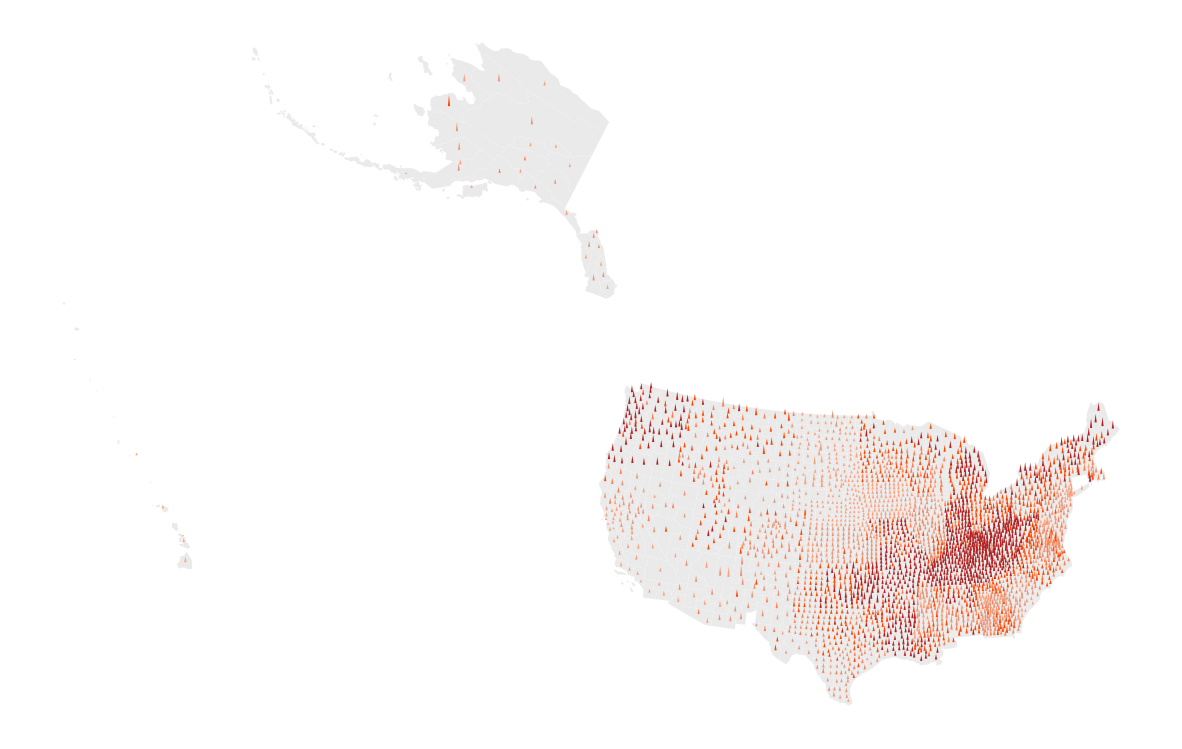

In [74]:
ax = geo_data.plot(
    figsize=(15, 15),
    color='#eaeaea',
    edgecolor='white',
    linewidth=0.05,
)


ax.axis('off')

# add a black state outline on top

def spike_color(value):
    if 33.3 > value >= 25:
        return 'firebrick'
    elif 25 > value >=23:
        return 'orangered'
    elif 23 > value >= 22:
        return 'coral'
    elif 22 > value >= 20:
        return 'darksalmon'
    else:
        return 'lightsalmon'   
    # you can do an if/elif/else for color
    # or you can look up "matplotlib color scales" (you can google that)


# Add spikes & labels
for i, row in geo_data.iterrows():
    x, y = row.centroid
    
    # print(triangle_height(row.DataValue_y))

    # conditional for florida or any other areas without data
    # if row.dataValue_y is not a number (or is NaN or something)
    if row.DataValue_y:
        # Create a spike
        triangle = create_triangle(
            x,
            y,
            height = triangle_height(row.DataValue_y),
            base=10000, 
            color=spike_color(row.DataValue_x)
        )

        ax.add_patch(triangle)

plt.savefig(f'./asthma.svg', bbox_inches='tight')

### 5.2 depression and heart disease relationship -- a spike map

#### 5.2.1 join county map and data

In [75]:
# merging geo_data with the depression and heart disease data 
geo_data_heart_disease = geo.merge(
    combine_depression_heart_disease,
    how='inner',
    left_on=['coty_name_str', 'ste_name_str'],
    right_on=['County', 'State']
)
#.set_index(['coty_name'])

# Calculate a centroid for each town boundary
geo_data_heart_disease['centroid'] = geo_data_heart_disease.geometry.apply(
    lambda x: shape(x).centroid.coords[0]
)

geo_data_heart_disease

,geo_point_2d,year,ste_code,ste_name,coty_code,coty_name,coty_area_code,coty_type,coty_name_long,coty_fp_code,...,State,County,DataValue_x,Category_x,Geolocation_x,Year_y,DataValue_y,Category_y,Geolocation_y,centroid
0,"{'lon': -93.99206370718835, 'lat': 40.35466873...",2022,[29],[Missouri],[29081],[Harrison],USA,county,[Harrison County],081,...,Missouri,Harrison,25.6,Depression,POINT (-93.9925818 40.34562),2021,6.6,Coronary Heart Disease,POINT (-93.9925818 40.34562),"(169039.86926351642, 321765.22087233566)"
1,"{'lon': -90.53771211550016, 'lat': 38.26100393...",2022,[29],[Missouri],[29099],[Jefferson],USA,county,[Jefferson County],099,...,Missouri,Jefferson,25.0,Depression,POINT (-90.5436807 38.2576296),2021,5.6,Coronary Heart Disease,POINT (-90.5436807 38.2576296),"(473218.9136046882, 98864.32074957807)"
2,"{'lon': -94.33924648479106, 'lat': 36.90550895...",2022,[29],[Missouri],[29145],[Newton],USA,county,[Newton County],145,...,Missouri,Newton,25.5,Depression,POINT (-94.335034 36.9083713),2021,6.1,Coronary Heart Disease,POINT (-94.335034 36.9083713),"(146573.98402335835, -65347.49718074597)"
3,"{'lon': -90.46142948091351, 'lat': 37.11263544...",2022,[29],[Missouri],[29223],[Wayne],USA,county,[Wayne County],223,...,Missouri,Wayne,28.7,Depression,POINT (-90.4539307 37.1110737),2021,7.4,Coronary Heart Disease,POINT (-90.4539307 37.1110737),"(487252.5646766326, -29161.484294387545)"
4,"{'lon': -115.4050804689004, 'lat': 48.54247976...",2022,[30],[Montana],[30053],[Lincoln],USA,county,[Lincoln County],053,...,Montana,Lincoln,25.5,Depression,POINT (-115.4631849 48.5523847),2021,5.9,Coronary Heart Disease,POINT (-115.4631849 48.5523847),"(-1437896.7926272056, 1378393.9664562591)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,"{'lon': -91.408829118662, 'lat': 47.5232212915...",2022,[27],[Minnesota],[27075],[Lake],USA,county,[Lake County],075,...,Minnesota,Lake,21.8,Depression,POINT (-91.4117038 47.5171114),2021,5.0,Coronary Heart Disease,POINT (-91.4117038 47.5171114),"(347886.05250348273, 1126899.931401231)"
3063,"{'lon': -94.61303322931869, 'lat': 45.55213974...",2022,[27],[Minnesota],[27145],[Stearns],USA,county,[Stearns County],145,...,Minnesota,Stearns,23.6,Depression,POINT (-94.6104822 45.5552345),2021,5.1,Coronary Heart Disease,POINT (-94.6104822 45.5552345),"(108332.48521019187, 901159.3863489096)"
3064,"{'lon': -89.8020061955374, 'lat': 33.769954007...",2022,[28],[Mississippi],[28043],[Grenada],USA,county,[Grenada County],043,...,Mississippi,Grenada,21.1,Depression,POINT (-89.8027405 33.770031),2021,6.6,Coronary Heart Disease,POINT (-89.8027405 33.770031),"(569637.2291762267, -398916.4460912331)"
3065,"{'lon': -88.64115956577189, 'lat': 32.75455794...",2022,[28],[Mississippi],[28069],[Kemper],USA,county,[Kemper County],069,...,Mississippi,Kemper,19.4,Depression,POINT (-88.6256306 32.7501361),2021,6.8,Coronary Heart Disease,POINT (-88.6256306 32.7501361),"(684841.3136663917, -504290.86558323127)"


#### 5.2.2 triangles' setting

In [76]:
def create_triangle(x, y, height, base, color='black'):
    """ Returns a triangle polygon whose middle of base is located at (x,y) """
    return plt.Polygon(
        [[x-base, y], [x, y+height], [x+base, y]],
        facecolor=color,
        # edgecolor=None,
        # fill=True,
        linewidth=None
    )


In [78]:
domain = [
    geo_data_heart_disease['DataValue_y'].min(),
    geo_data_heart_disease['DataValue_y'].max()
]
triangle_range = [500,100000]

# used chatGPT
def triangle_height(value, from_low=domain[0], from_high=domain[1], to_low=triangle_range[0], to_high=triangle_range[1]):
  
    # Ensure the value is within the original range
    value = max(min(value, from_high), from_low)

    # Calculate the proportion of the original range the value represents
    proportion = (value - from_low) / (from_high - from_low)

    # Map the proportion to the target range
    mapped_value = to_low + proportion * (to_high - to_low)

    return mapped_value

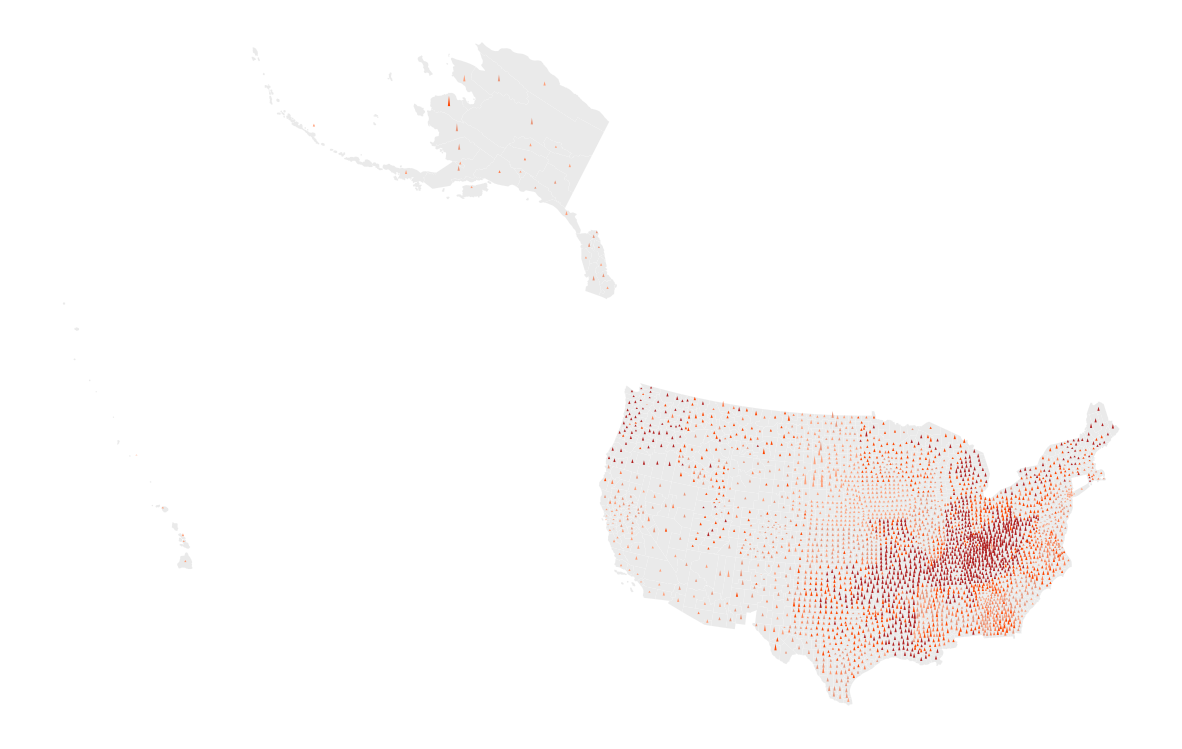

In [79]:
ax = geo_data_heart_disease.plot(
    figsize=(15, 15),
    color='#eaeaea',
    edgecolor='white',
    linewidth=0.05,
)


ax.axis('off')

# add a black state outline on top

def spike_color(value):
    if 33.3 > value >= 25:
        return 'firebrick'
    elif 25 > value >=23:
        return 'orangered'
    elif 23 > value >= 22:
        return 'coral'
    elif 22 > value >= 20:
        return 'darksalmon'
    else:
        return 'lightsalmon'   
    # you can do an if/elif/else for color
    # or you can look up "matplotlib color scales" (you can google that)


# Add spikes & labels
for i, row in geo_data_heart_disease.iterrows():
    x, y = row.centroid
    
    # print(triangle_height(row.DataValue_y))

    # conditional for florida or any other areas without data
    # if row.dataValue_y is not a number (or is NaN or something)
    if row.DataValue_y:
        # Create a spike
        triangle = create_triangle(
            x,
            y,
            height = triangle_height(row.DataValue_y),
            base=10000, 
            color=spike_color(row.DataValue_x)
        )

        ax.add_patch(triangle)

plt.savefig(f'./heartdisease.svg', bbox_inches='tight')

### 5.3 depression and smoking relationship -- a spike map

#### 5.3.1 join county map and data

In [80]:
# merging geo_data with the depression and smoking data 
geo_data_smoking = geo.merge(
    combine_depression_smoking,
    how='inner',
    left_on=['coty_name_str', 'ste_name_str'],
    right_on=['County', 'State']
)
#.set_index(['coty_name'])

# Calculate a centroid for each town boundary
geo_data_smoking['centroid'] = geo_data_smoking.geometry.apply(
    lambda x: shape(x).centroid.coords[0]
)

geo_data_smoking

,geo_point_2d,year,ste_code,ste_name,coty_code,coty_name,coty_area_code,coty_type,coty_name_long,coty_fp_code,...,State,County,DataValue_x,Category_x,Geolocation_x,Year_y,DataValue_y,Category_y,Geolocation_y,centroid
0,"{'lon': -93.99206370718835, 'lat': 40.35466873...",2022,[29],[Missouri],[29081],[Harrison],USA,county,[Harrison County],081,...,Missouri,Harrison,25.6,Depression,POINT (-93.9925818 40.34562),2021,23.3,Current Smoking,POINT (-93.9925818 40.34562),"(169039.86926351642, 321765.22087233566)"
1,"{'lon': -90.53771211550016, 'lat': 38.26100393...",2022,[29],[Missouri],[29099],[Jefferson],USA,county,[Jefferson County],099,...,Missouri,Jefferson,25.0,Depression,POINT (-90.5436807 38.2576296),2021,19.5,Current Smoking,POINT (-90.5436807 38.2576296),"(473218.9136046882, 98864.32074957807)"
2,"{'lon': -94.33924648479106, 'lat': 36.90550895...",2022,[29],[Missouri],[29145],[Newton],USA,county,[Newton County],145,...,Missouri,Newton,25.5,Depression,POINT (-94.335034 36.9083713),2021,21.7,Current Smoking,POINT (-94.335034 36.9083713),"(146573.98402335835, -65347.49718074597)"
3,"{'lon': -90.46142948091351, 'lat': 37.11263544...",2022,[29],[Missouri],[29223],[Wayne],USA,county,[Wayne County],223,...,Missouri,Wayne,28.7,Depression,POINT (-90.4539307 37.1110737),2021,27.9,Current Smoking,POINT (-90.4539307 37.1110737),"(487252.5646766326, -29161.484294387545)"
4,"{'lon': -115.4050804689004, 'lat': 48.54247976...",2022,[30],[Montana],[30053],[Lincoln],USA,county,[Lincoln County],053,...,Montana,Lincoln,25.5,Depression,POINT (-115.4631849 48.5523847),2021,20.4,Current Smoking,POINT (-115.4631849 48.5523847),"(-1437896.7926272056, 1378393.9664562591)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,"{'lon': -91.408829118662, 'lat': 47.5232212915...",2022,[27],[Minnesota],[27075],[Lake],USA,county,[Lake County],075,...,Minnesota,Lake,21.8,Depression,POINT (-91.4117038 47.5171114),2021,17.1,Current Smoking,POINT (-91.4117038 47.5171114),"(347886.05250348273, 1126899.931401231)"
3063,"{'lon': -94.61303322931869, 'lat': 45.55213974...",2022,[27],[Minnesota],[27145],[Stearns],USA,county,[Stearns County],145,...,Minnesota,Stearns,23.6,Depression,POINT (-94.6104822 45.5552345),2021,17.0,Current Smoking,POINT (-94.6104822 45.5552345),"(108332.48521019187, 901159.3863489096)"
3064,"{'lon': -89.8020061955374, 'lat': 33.769954007...",2022,[28],[Mississippi],[28043],[Grenada],USA,county,[Grenada County],043,...,Mississippi,Grenada,21.1,Depression,POINT (-89.8027405 33.770031),2021,21.2,Current Smoking,POINT (-89.8027405 33.770031),"(569637.2291762267, -398916.4460912331)"
3065,"{'lon': -88.64115956577189, 'lat': 32.75455794...",2022,[28],[Mississippi],[28069],[Kemper],USA,county,[Kemper County],069,...,Mississippi,Kemper,19.4,Depression,POINT (-88.6256306 32.7501361),2021,21.8,Current Smoking,POINT (-88.6256306 32.7501361),"(684841.3136663917, -504290.86558323127)"


#### 5.3.2 triangles' setting

In [81]:
def create_triangle(x, y, height, base, color='black'):
    """ Returns a triangle polygon whose middle of base is located at (x,y) """
    return plt.Polygon(
        [[x-base, y], [x, y+height], [x+base, y]],
        facecolor=color,
        # edgecolor=None,
        # fill=True,
        linewidth=None
    )


In [82]:
domain = [
    geo_data_smoking['DataValue_y'].min(),
    geo_data_smoking['DataValue_y'].max()
]
triangle_range = [500,100000]

# used chatGPT
def triangle_height(value, from_low=domain[0], from_high=domain[1], to_low=triangle_range[0], to_high=triangle_range[1]):
  
    # Ensure the value is within the original range
    value = max(min(value, from_high), from_low)

    # Calculate the proportion of the original range the value represents
    proportion = (value - from_low) / (from_high - from_low)

    # Map the proportion to the target range
    mapped_value = to_low + proportion * (to_high - to_low)

    return mapped_value

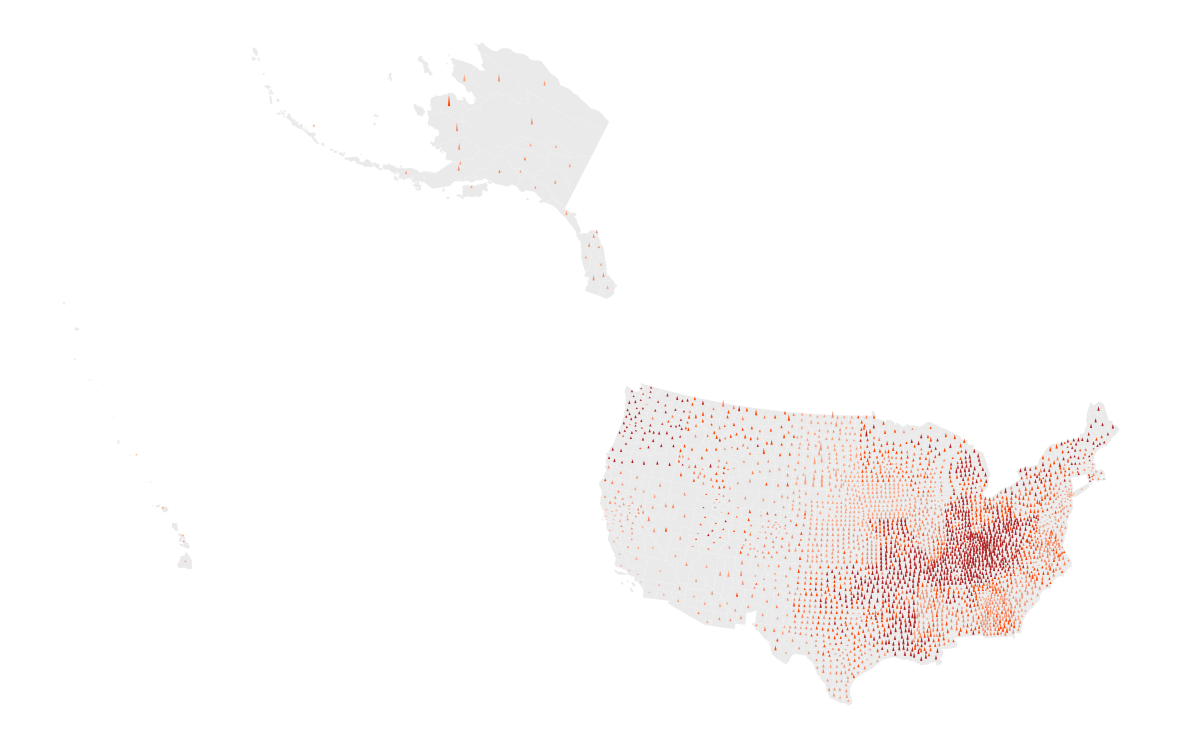

In [84]:
ax = geo_data_smoking.plot(
    figsize=(15, 15),
    color='#eaeaea',
    edgecolor='white',
    linewidth=0.05,
)


ax.axis('off')

# add a black state outline on top

def spike_color(value):
    if 33.3 > value >= 25:
        return 'firebrick'
    elif 25 > value >=23:
        return 'orangered'
    elif 23 > value >= 22:
        return 'coral'
    elif 22 > value >= 20:
        return 'darksalmon'
    else:
        return 'lightsalmon'   
    # you can do an if/elif/else for color
    # or you can look up "matplotlib color scales" (you can google that)


# Add spikes & labels
for i, row in geo_data_smoking.iterrows():
    x, y = row.centroid
    
    # print(triangle_height(row.DataValue_y))

    # conditional for florida or any other areas without data
    # if row.dataValue_y is not a number (or is NaN or something)
    if row.DataValue_y:
        # Create a spike
        triangle = create_triangle(
            x,
            y,
            height = triangle_height(row.DataValue_y),
            base=10000, 
            color=spike_color(row.DataValue_x)
        )

        ax.add_patch(triangle)

plt.savefig(f'./smoking.svg', bbox_inches='tight')

# results:

I've created three maps that individually depict the relationship between depression and asthma, heart disease and smoking at the county level. 

Each triangle on the map is color-coded to represent the depression rate, while the height of each triangle corresponds to the asthma, heart disease, and smoking rate respectively in the three maps. You can observe that most counties with darker triangles also have higher triangles. 

Populations in West Virginia, Kentucky, and Tennessee exhibit high rates of depression, asthma, heart disease, and smoking. Meanwhile, populations in Washington and Oregon show a high depression rate but maintain lower rates of heart disease and smoking.